In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/dataset/Fake_Headline_data.csv"
!ls "/content/drive/My Drive/dataset/Real_Headline_data.csv"

Mounted at /content/drive
'/content/drive/My Drive/dataset/Fake_Headline_data.csv'
'/content/drive/My Drive/dataset/Real_Headline_data.csv'


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/dataset/Fake_Headline_data.csv', engine='python', encoding='utf-8')
df2 = pd.read_csv('/content/drive/My Drive/dataset/Real_Headline_data.csv', engine='python', encoding='utf-8')

In [ ]:
df1.head()

,Unnamed: 0,headline,category,label
0,0,তোমরা ঢাবির চেয়ে বেটার ইউনিভার্সিটি ডিজার্ভ কর...,Satire,0
1,1,টানা দুই মিনিট মিথ্যা বলার রেকর্ড গড়লেন মাওলান...,Satire,0
2,2,কাতার-কায়রো বিমান রুটে মিললো হিমালয়ের দ্বিতীয় ...,Satire,0
3,3,পাত্রীর সরিষা ক্ষেতে ছবি না থাকায় বিয়ে ভেঙ্গে ...,Satire,0
4,4,আবদুল কাদের সম্পর্কে যে ৭টি তথ্য আপনি নাও জানত...,Satire,0


In [ ]:
df1 = df1.rename(columns={'Unnamed: 0': 'ID'} )

In [ ]:
df1.head()

,ID,headline,category,label
0,0,তোমরা ঢাবির চেয়ে বেটার ইউনিভার্সিটি ডিজার্ভ কর...,Satire,0
1,1,টানা দুই মিনিট মিথ্যা বলার রেকর্ড গড়লেন মাওলান...,Satire,0
2,2,কাতার-কায়রো বিমান রুটে মিললো হিমালয়ের দ্বিতীয় ...,Satire,0
3,3,পাত্রীর সরিষা ক্ষেতে ছবি না থাকায় বিয়ে ভেঙ্গে ...,Satire,0
4,4,আবদুল কাদের সম্পর্কে যে ৭টি তথ্য আপনি নাও জানত...,Satire,0


In [ ]:
df2.head()

,Unnamed: 0,headline,category,label
0,0,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",Education,1
1,1,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,National,1
2,2,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,National,1
3,3,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,Crime,1
4,4,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,National,1


In [ ]:
#merge the dataset

In [ ]:
Total = [df1,df2]
df3 = pd.concat(Total)
df3.head(1555)

,Unnamed: 0,headline,category,label
0,0,তোমরা ঢাবির চেয়ে বেটার ইউনিভার্সিটি ডিজার্ভ কর...,Satire,0
1,1,টানা দুই মিনিট মিথ্যা বলার রেকর্ড গড়লেন মাওলান...,Satire,0
2,2,কাতার-কায়রো বিমান রুটে মিললো হিমালয়ের দ্বিতীয় ...,Satire,0
3,3,পাত্রীর সরিষা ক্ষেতে ছবি না থাকায় বিয়ে ভেঙ্গে ...,Satire,0
4,4,আবদুল কাদের সম্পর্কে যে ৭টি তথ্য আপনি নাও জানত...,Satire,0
...,...,...,...,...
295,295,খালেদা জিয়ার চিকিৎসায় সরকারদলীয় চিকিৎসক রহস্যজ...,Editorial,1
296,296,ইস্কাটনে জোড়া খুন: এমপিপুত্র রনির মামলার রায় ৪...,National,1
297,297,সুস্থ না হওয়া পর্যন্ত আদালতে হাজিরা দিতে পারবে...,Politics,1
298,298,ইভিএম নিয়ে বিশ্বময় অশান্তি ও প্রতিবাদের ঝড় বইছ...,Politics,1


In [ ]:
df3.value_counts()

Unnamed: 0  headline                                                                           category       label
1799        দশমিনায় জমি সংক্রান্ত বিরোধে যুবক নিহত                                             National       1        1
346         প্রাক্তনের বিয়েতে প্রতিশোধ নেয়ার ১২টি নিনজা টেকনিক                                 Lifestyle      0        1
350         গতকাল রাতে আমি সানি লিওনির সাথে ছিলাম : খান হেলাল                                  Miscellaneous  0        1
            আটকে যাচ্ছে সংসদ নির্বাচন, তফসিল ঘোষণা স্থগিত চেয়ে আবেদন                           National       1        1
349         ভারত-বাংলাদেশের সম্পর্ক অনন্য উচ্চতায় উন্নীত হয়েছে: প্রধানমন্ত্রী                  National       1        1
                                                                                                                      ..
856         ঠোঁটকাটা ও তালুকাটা ব্যক্তিদের বিনামূল্যে অপারেশনের সুযোগ                          National       1        1
855         পাটুরিয়া-দৌলতদিয়া রুটে ফে

In [ ]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df3.describe()

,Unnamed: 0,label
count,3055.000000,3055.000000
mean,681.759083,0.589198
std,510.684843,0.492060
min,0.000000,0.000000
25%,220.500000,0.000000
50%,602.000000,1.000000
75%,1035.500000,1.000000
max,1799.000000,1.000000


In [ ]:
df3.shape

(3055, 4)

In [ ]:
df3.head()

,Unnamed: 0,headline,category,label
0,0,তোমরা ঢাবির চেয়ে বেটার ইউনিভার্সিটি ডিজার্ভ কর...,Satire,0
1,1,টানা দুই মিনিট মিথ্যা বলার রেকর্ড গড়লেন মাওলান...,Satire,0
2,2,কাতার-কায়রো বিমান রুটে মিললো হিমালয়ের দ্বিতীয় ...,Satire,0
3,3,পাত্রীর সরিষা ক্ষেতে ছবি না থাকায় বিয়ে ভেঙ্গে ...,Satire,0
4,4,আবদুল কাদের সম্পর্কে যে ৭টি তথ্য আপনি নাও জানত...,Satire,0


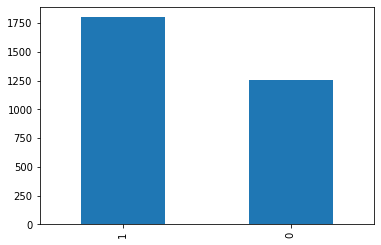

In [ ]:
df3['label'].value_counts().plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 5)

In [ ]:
y = df3.label

In [ ]:
df = df3.drop('label', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['headline'], y, test_size=0.20, random_state=30)

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
tfidf_vectorizer.get_feature_names()[-10:]

['৮ট', '৮৩', '৮৬', '৮৮০', '৯ট', '৯০', '৯০০', '৯২১', '৯৮', '৯৯৯']

In [ ]:
count_vectorizer.get_feature_names()[:10]

['2050',
 '31',
 'aiub',
 'beats',
 'bed',
 'bengal',
 'bengali',
 'bhor',
 'blue',
 'bra']

In [ ]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [ ]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [ ]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [ ]:
print(count_df.equals(tfidf_df))

False


In [ ]:
count_df.head()

,2050,31,aiub,beats,bed,bengal,bengali,bhor,blue,bra,btsক,btv,bup,chotobhai,common,cr7,ctnews7,day,dinner,endgame,exclusive,eআরক,gala,game,golden,good,got,gpa,hawkeye,hbo,ias,imun,interview,miss,mrs,ms,nid,night,prothom,sense,...,৪১,৪২,৪৩,৪৩৭,৪৪,৪৬,৪৭,৪৮,৪৯,৫ট,৫০,৫০০,৫০৮৮,৫১,৫২,৫৪,৫৫,৫৬,৫৭,৫৭ট,৬ট,৬০,৬৩,৬৪,৬৫,৭জনক,৭ট,৭০,৭০০,৭৭,৮ট,৮৩,৮৬,৮৮০,৯ট,৯০,৯০০,৯২১,৯৮,৯৯৯
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tfidf_df.head()

,2050,31,aiub,beats,bed,bengal,bengali,bhor,blue,bra,btsক,btv,bup,chotobhai,common,cr7,ctnews7,day,dinner,endgame,exclusive,eআরক,gala,game,golden,good,got,gpa,hawkeye,hbo,ias,imun,interview,miss,mrs,ms,nid,night,prothom,sense,...,৪১,৪২,৪৩,৪৩৭,৪৪,৪৬,৪৭,৪৮,৪৯,৫ট,৫০,৫০০,৫০৮৮,৫১,৫২,৫৪,৫৫,৫৬,৫৭,৫৭ট,৬ট,৬০,৬৩,৬৪,৬৫,৭জনক,৭ট,৭০,৭০০,৭৭,৮ট,৮৩,৮৬,৮৮০,৯ট,৯০,৯০০,৯২১,৯৮,৯৯৯
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
clf = MultinomialNB()

accuracy:   0.815
Confusion matrix, without normalization


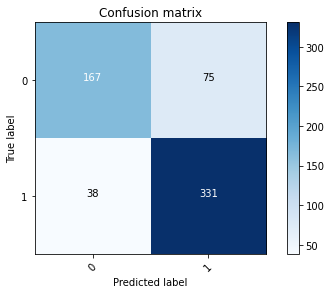

In [ ]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [ ]:
clf = MultinomialNB()

accuracy:   0.822
Confusion matrix, without normalization


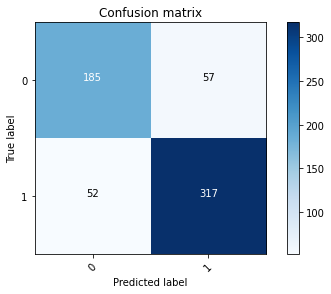

In [ ]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [ ]:
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=30)

accuracy:   0.794
Confusion matrix, without normalization


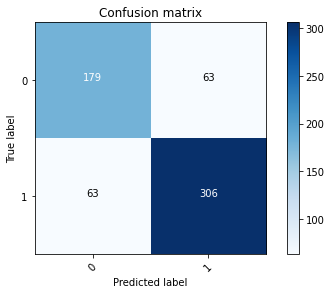

In [ ]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [ ]:
clf = MultinomialNB(alpha=0.1)

In [ ]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.79705
Alpha: 0.10 Score: 0.80851
Alpha: 0.20 Score: 0.81342
Alpha: 0.30 Score: 0.81342
Alpha: 0.40 Score: 0.81178
Alpha: 0.50 Score: 0.81506
Alpha: 0.60 Score: 0.81669
Alpha: 0.70 Score: 0.81833
Alpha: 0.80 Score: 0.81833
Alpha: 0.90 Score: 0.81178


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [ ]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

0 -38.45151659940867 কণ
0 -21.2778179948746 মণব
0 -19.164872490180798 নট
0 -18.629479986217234 সময
0 -17.0796297593848 যট
0 -14.171348785398331 আসল
0 -14.136857014632294 নয়নশ
0 -13.893227775901018 ১০ট
0 -13.882703499758184 শল
0 -13.28725878377188 ওয
0 -12.483285284361354 পথ
0 -12.477421656271837 রয
0 -12.471374649477342 গর
0 -12.29596884341225 beats
0 -12.29596884341225 bengal
0 -11.97915352591571 এর
0 -11.80727036797253 bup
0 -11.558021207357593 কআপ
0 -11.3813057810095 ণত
0 -11.33177091691095 উগ
0 -11.29532392243884 লর
0 -10.449838998474453 উম
0 -10.38920594672132 আসত
0 -10.306542393524149 পড
0 -9.949827995047695 সইছ
0 -9.893090282610915 জড়
0 -9.61263913290649 রশ
0 -9.603472477722496 eআরক
0 -9.361416733234565 উইম
0 -9.22416843641608 সবসময়

1 18.391823985504022 আসন
1 17.43043054886377 আশর
1 15.76990731930034 দগ
1 13.128482450580162 জক
1 12.70278218057155 জয়
1 11.963040112023066 যত
1 11.701084278078598 মওদ
1 11.696472596433539 অপম
1 11.619372084689665 রপত
1 11.45599275505768 নড়
1 11.426

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names()

In [ ]:
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-4.501848633091521, 'রত'),
 (-4.860664033882081, 'পর'),
 (-4.864819574396412, 'কর'),
 (-4.874374381069796, 'বর'),
 (-4.949461067867032, 'হত'),
 (-5.007869711773758, 'রধ'),
 (-5.072569581027332, 'নমন'),
 (-5.096484335434797, 'উদ'),
 (-5.162402065809775, 'বন'),
 (-5.215267719400251, 'শর'),
 (-5.278826840103676, '২০১৮'),
 (-5.30559629581492, 'সরক'),
 (-5.330775906018003, 'সম'),
 (-5.363715664240833, 'পত'),
 (-5.381359401323497, 'মল'),
 (-5.387109577383983, '১৯'),
 (-5.397325048519488, 'তর'),
 (-5.4075016956186, 'জন'),
 (-5.443306673212843, 'অভ'),
 (-5.535544946417706, 'রল')]

In [ ]:
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-8.459655230141006, '2050'),
 (-8.459655230141006, '31'),
 (-8.459655230141006, 'aiub'),
 (-8.459655230141006, 'beats'),
 (-8.459655230141006, 'bed'),
 (-8.459655230141006, 'bengal'),
 (-8.459655230141006, 'bengali'),
 (-8.459655230141006, 'bhor'),
 (-8.459655230141006, 'blue'),
 (-8.459655230141006, 'bra'),
 (-8.459655230141006, 'btsক'),
 (-8.459655230141006, 'btv'),
 (-8.459655230141006, 'bup'),
 (-8.459655230141006, 'chotobhai'),
 (-8.459655230141006, 'common'),
 (-8.459655230141006, 'cr7'),
 (-8.459655230141006, 'ctnews7'),
 (-8.459655230141006, 'day'),
 (-8.459655230141006, 'dinner'),
 (-8.459655230141006, 'endgame')]

In [ ]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [ ]:
hash_vectorizer = HashingVectorizer(stop_words='english')
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

In [ ]:
clf = MultinomialNB(alpha=.01)

In [ ]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [ ]:
clf = PassiveAggressiveClassifier(n_iter_no_change=30)

accuracy:   0.791
Confusion matrix, without normalization


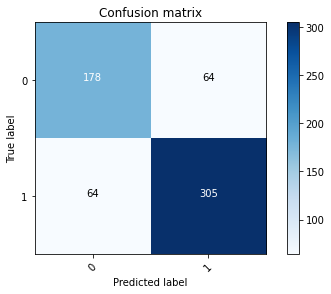

In [ ]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])